In [1]:
import pandas as pd
import numpy as np
import mysql.connector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [2]:
import mysql.connector

# Connect to MySQL server (without specifying database yet)
conn = mysql.connector.connect(
    host='localhost',        # Your host, usually 'localhost'
    user='root',             # Your MySQL username
    password='Gayathri@8799' # Your MySQL password
)
cursor = conn.cursor()

# Create a new database
cursor.execute("CREATE DATABASE IF NOT EXISTS diamond_db")
print("Database created successfully!")

# Connect to the new database
conn.database = 'diamond_db'

Database created successfully!


In [3]:
create_table_query = """
CREATE TABLE IF NOT EXISTS diamonds (
    id INT AUTO_INCREMENT PRIMARY KEY,
    carat FLOAT,
    cut VARCHAR(20),
    color VARCHAR(5),
    clarity VARCHAR(5),
    depth FLOAT,
    `table` FLOAT,
    price FLOAT,
    x FLOAT,
    y FLOAT,
    z FLOAT
)
"""
cursor.execute(create_table_query)
print("Table 'diamonds' created successfully!")

cursor.close()
conn.close()

Table 'diamonds' created successfully!


In [4]:
import pandas as pd
import mysql.connector

# Load CSV
df = pd.read_csv("diamonds.csv")

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Gayathri@8799',
    database='diamond_db'
)
cursor = conn.cursor()

# Insert data row by row
for i, row in df.iterrows():
    sql = """
    INSERT INTO diamonds (carat, cut, color, clarity, depth, `table`, price, x, y, z)
    VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """
    cursor.execute(sql, tuple(row))

# Commit and close
conn.commit()
cursor.close()
conn.close()

print("CSV data inserted successfully!")

CSV data inserted successfully!


In [5]:
import pandas as pd
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Gayathri@8799",
    database="diamond_db"
)
cursor = conn.cursor()

cursor.execute("SELECT * FROM diamonds")
rows = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=columns)

cursor.close()
conn.close()

df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [6]:
df = df.drop_duplicates()

In [7]:
import pandas as pd
import numpy as np

df_pre = df.copy() 

In [8]:
cols_xyz = ["x", "y", "z"]
for col in cols_xyz:
    df_pre[col] = df_pre[col].replace(0, np.nan)

In [9]:
df_pre.isna().sum()

id           0
carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x          104
y           91
z          260
dtype: int64

In [10]:
# Fill missing values using median
for col in df_pre.columns:
    if df_pre[col].isnull().sum() > 0:
        df_pre[col] = df_pre[col].fillna(df_pre[col].median())

In [11]:
# drop unnecessary columns
if "id" in df_pre.columns:
    df_pre.drop(columns=["id"], inplace=True)

In [12]:
#handling outliers
num_cols = ["carat", "depth", "table", "price", "x", "y", "z"]

for col in num_cols:
    Q1 = df_pre[col].quantile(0.25)
    Q3 = df_pre[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_pre = df_pre[(df_pre[col] >= lower) & (df_pre[col] <= upper)]

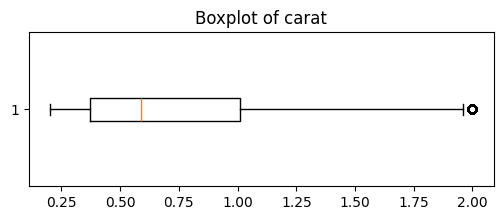

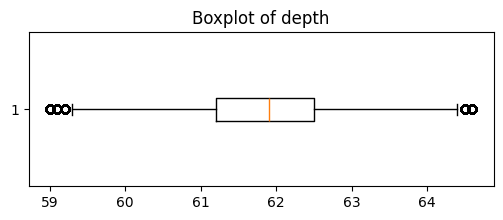

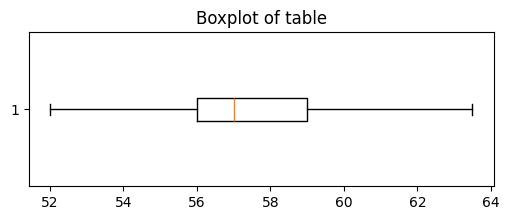

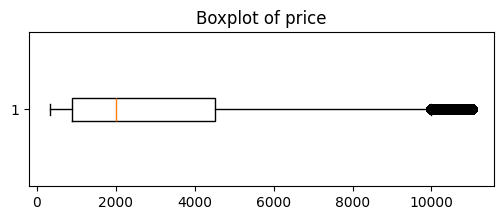

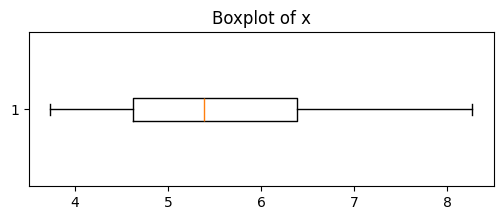

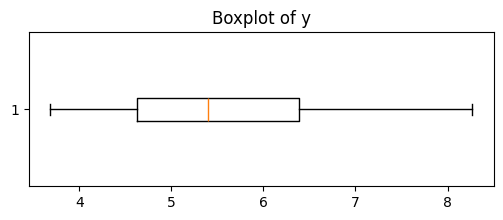

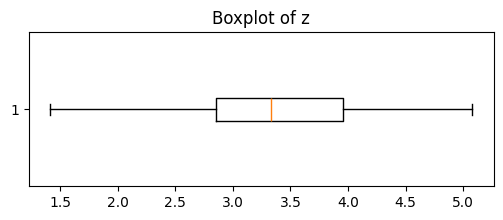

In [13]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6,2))
    plt.boxplot(df_pre[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [14]:
#skew check
df_pre[num_cols].skew()

carat    0.685351
depth   -0.197925
table    0.396896
price    1.143383
x        0.254800
y        0.248193
z        0.250391
dtype: float64

In [15]:
skewed_cols = ["carat", "price", "x", "y", "z"]

for col in skewed_cols:
    df_pre[col] = np.sqrt(df_pre[col])

In [16]:
df_pre.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.479583,Ideal,E,SI2,61.5,55.0,18.055470,1.987461,1.994994,1.558846
1,0.458258,Premium,E,SI1,59.8,61.0,18.055470,1.972308,1.959592,1.519868
3,0.538516,Premium,I,VS2,62.4,58.0,18.275667,2.049390,2.056696,1.621727
4,0.556776,Good,J,SI2,63.3,58.0,18.303005,2.083267,2.085665,1.658312
5,0.489898,Very Good,J,VVS2,62.8,57.0,18.330303,1.984943,1.989975,1.574802


In [17]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [18]:
df_eda = df_pre.copy()

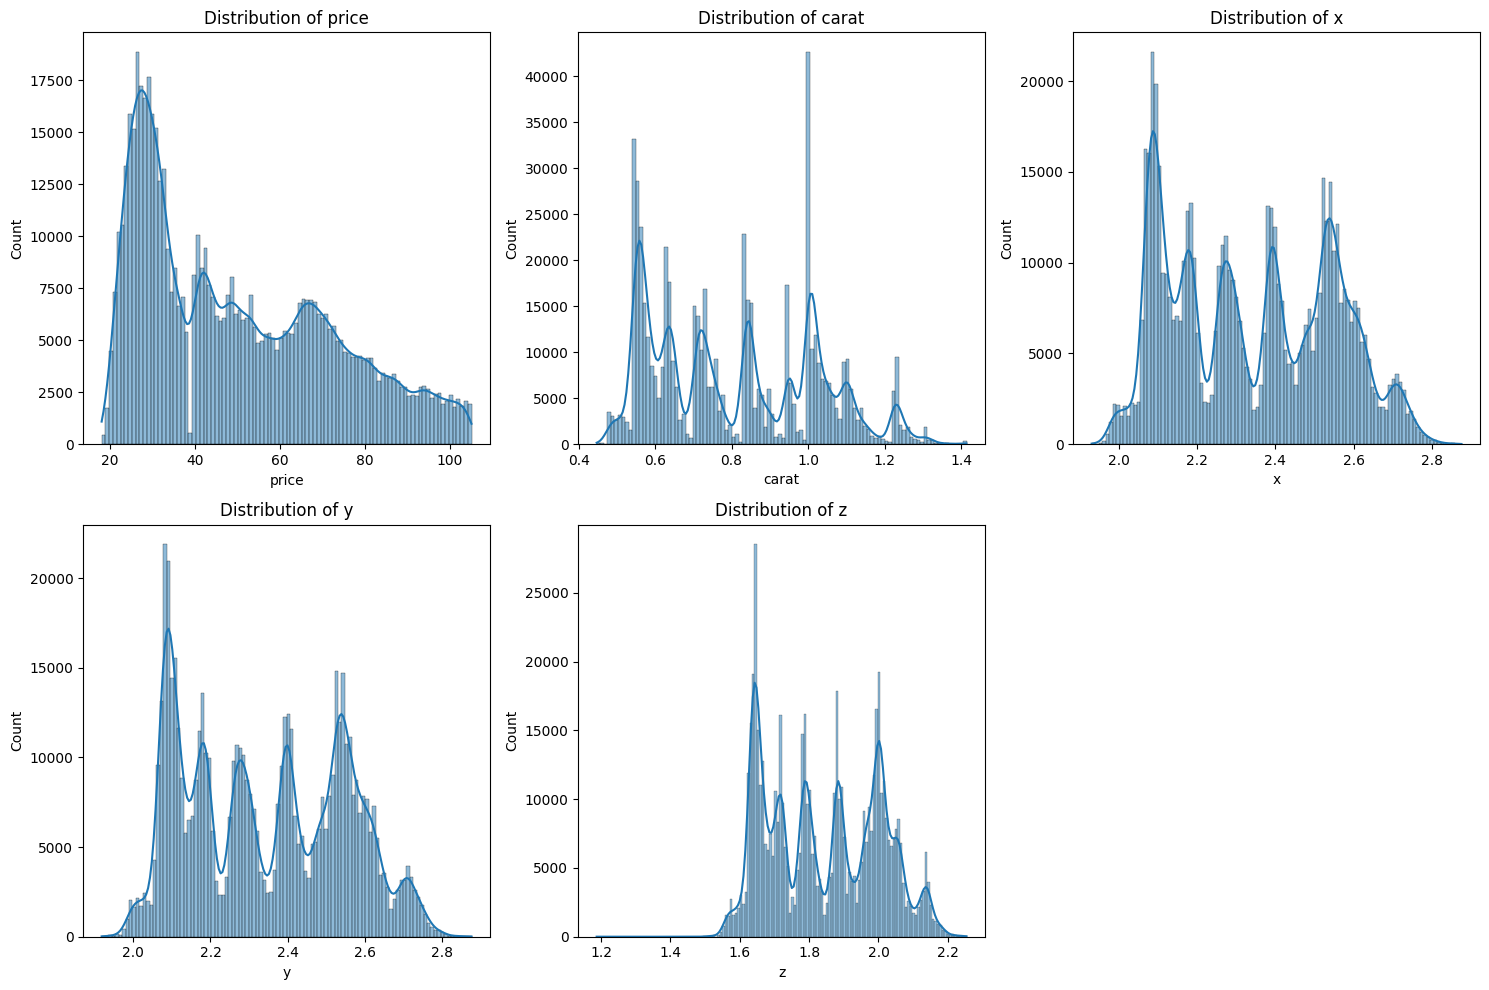

In [19]:
#Distribution plot
num_cols = ["price", "carat", "x", "y", "z"]

plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_eda[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

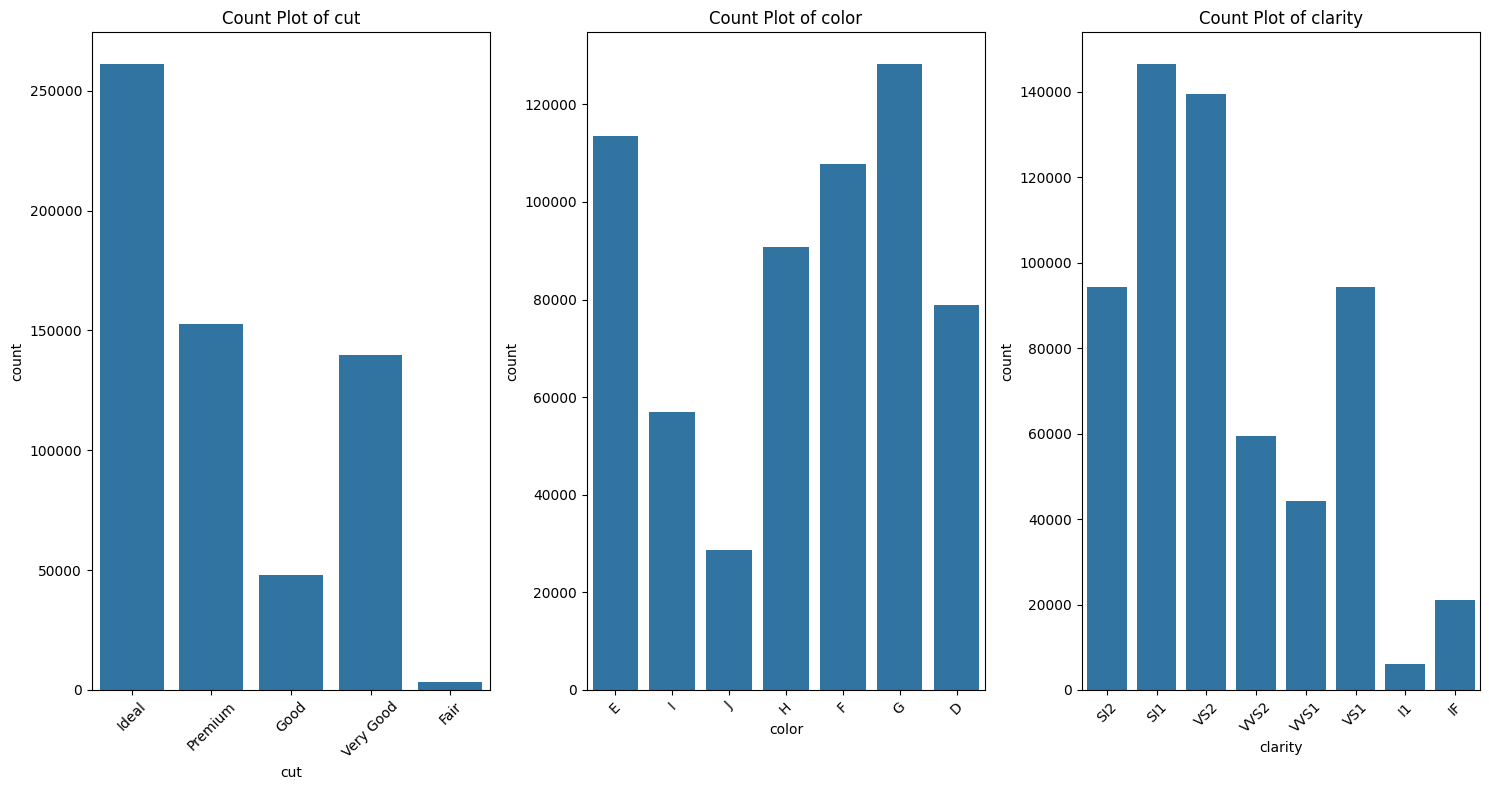

In [20]:
#count plot
cat_cols = ["cut", "color", "clarity"]

plt.figure(figsize=(15,8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df_eda, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

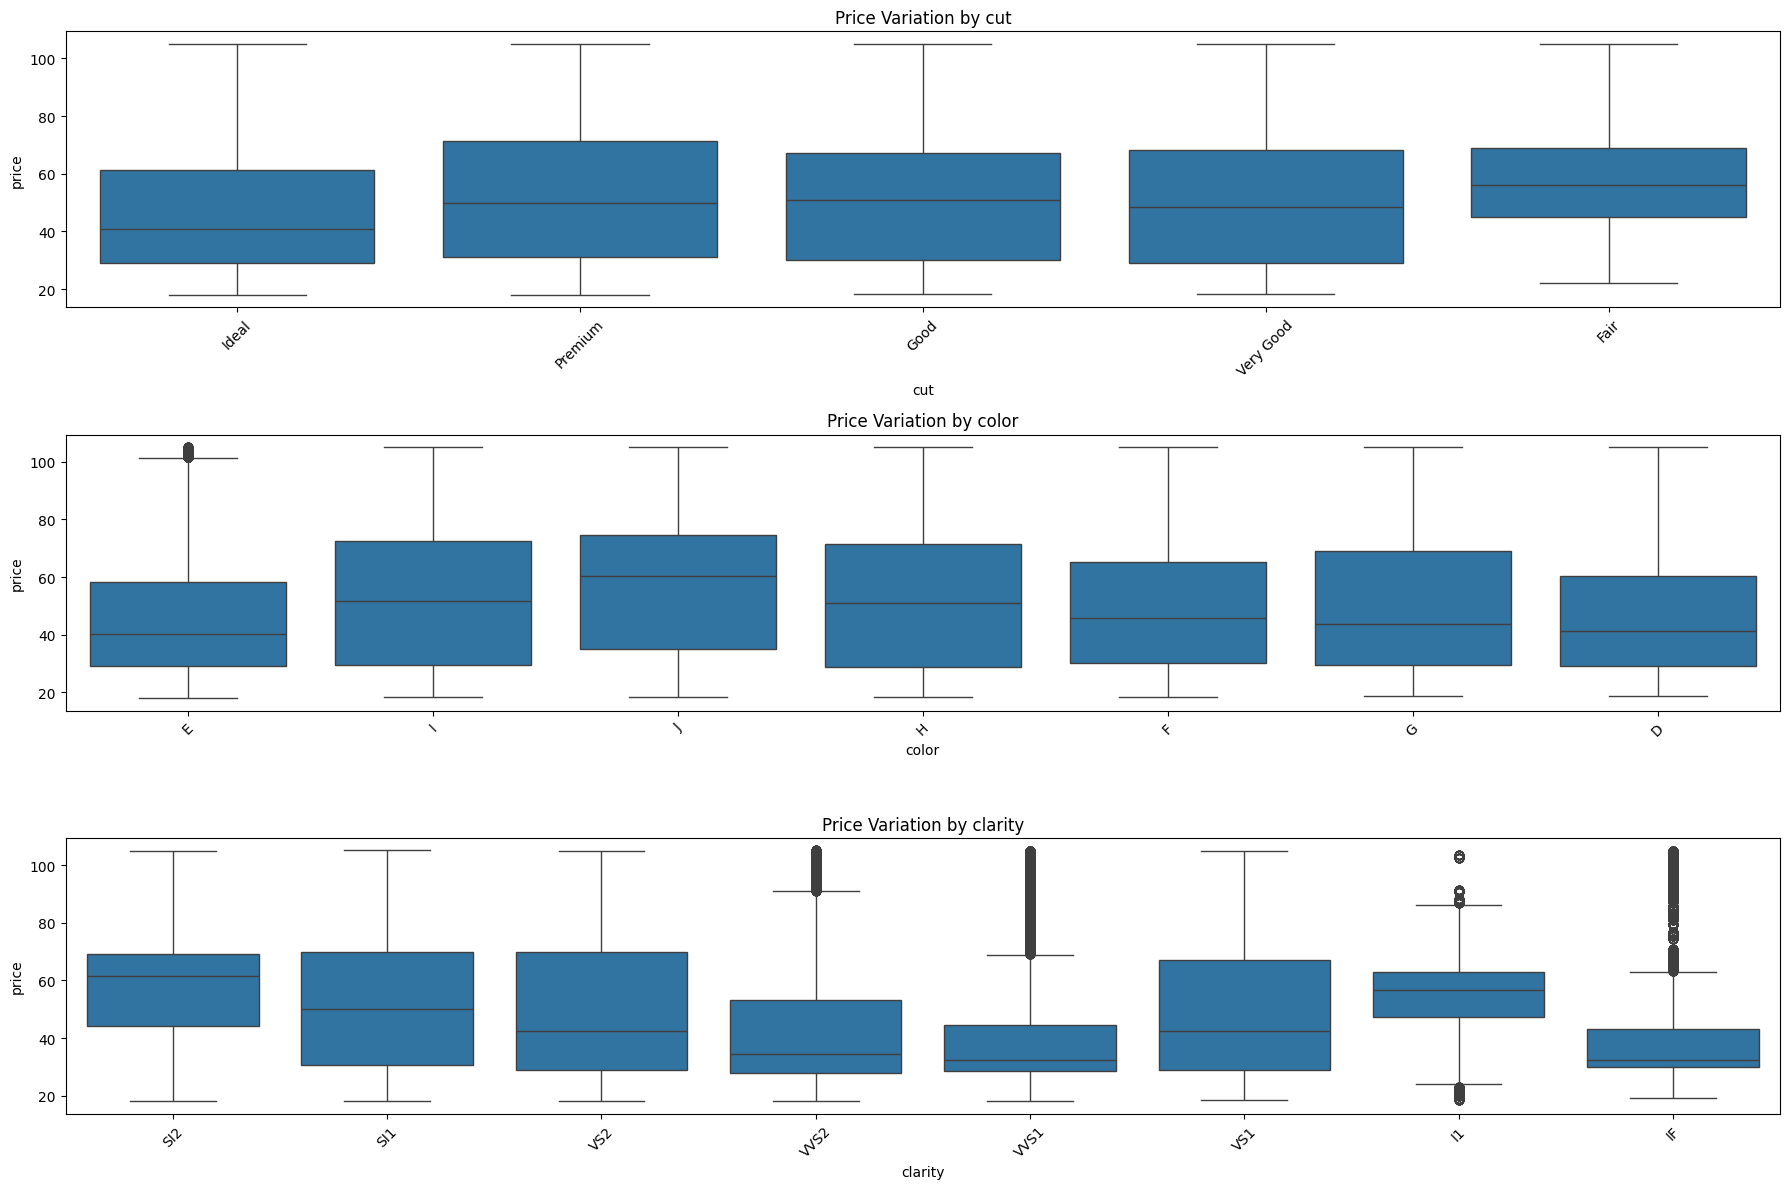

In [21]:
# Price variation with carat, cut, color, clarity using boxplots
plt.figure(figsize=(18,12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=df_eda, x=col, y="price")
    plt.title(f"Price Variation by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

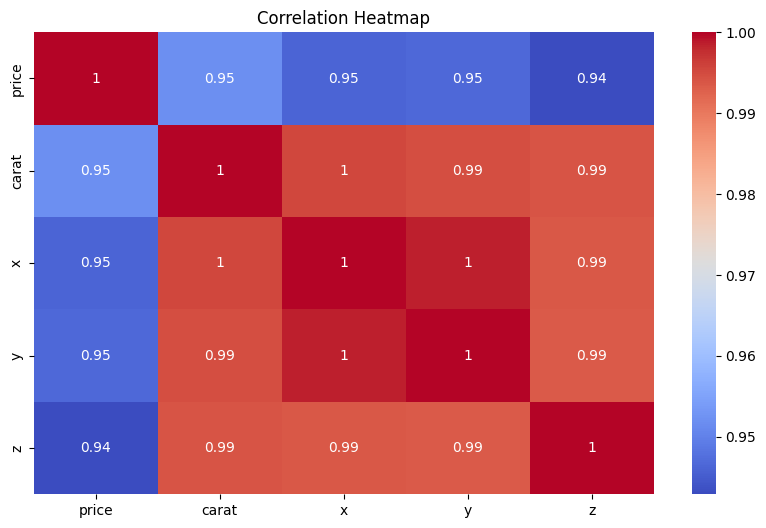

In [22]:
# Correlation heatmap for numerical features

plt.figure(figsize=(10,6))
sns.heatmap(df_eda[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

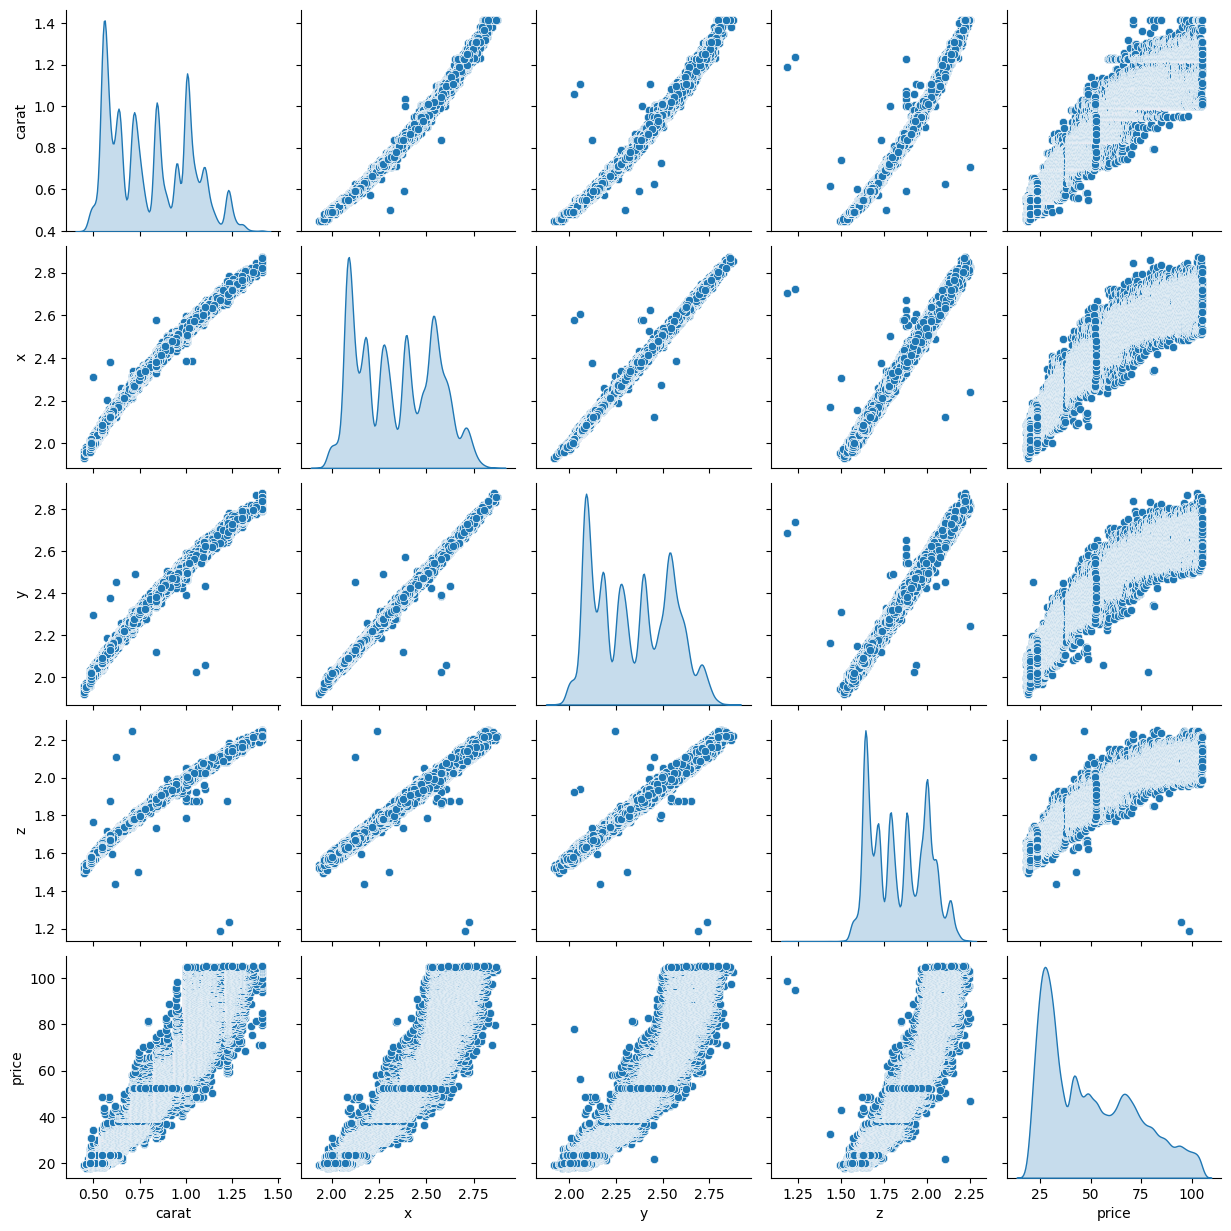

In [23]:
# Scatterplot matrix for carat, x, y, z, and price

sns.pairplot(df_eda[["carat", "x", "y", "z", "price"]], diag_kind="kde")
plt.show()

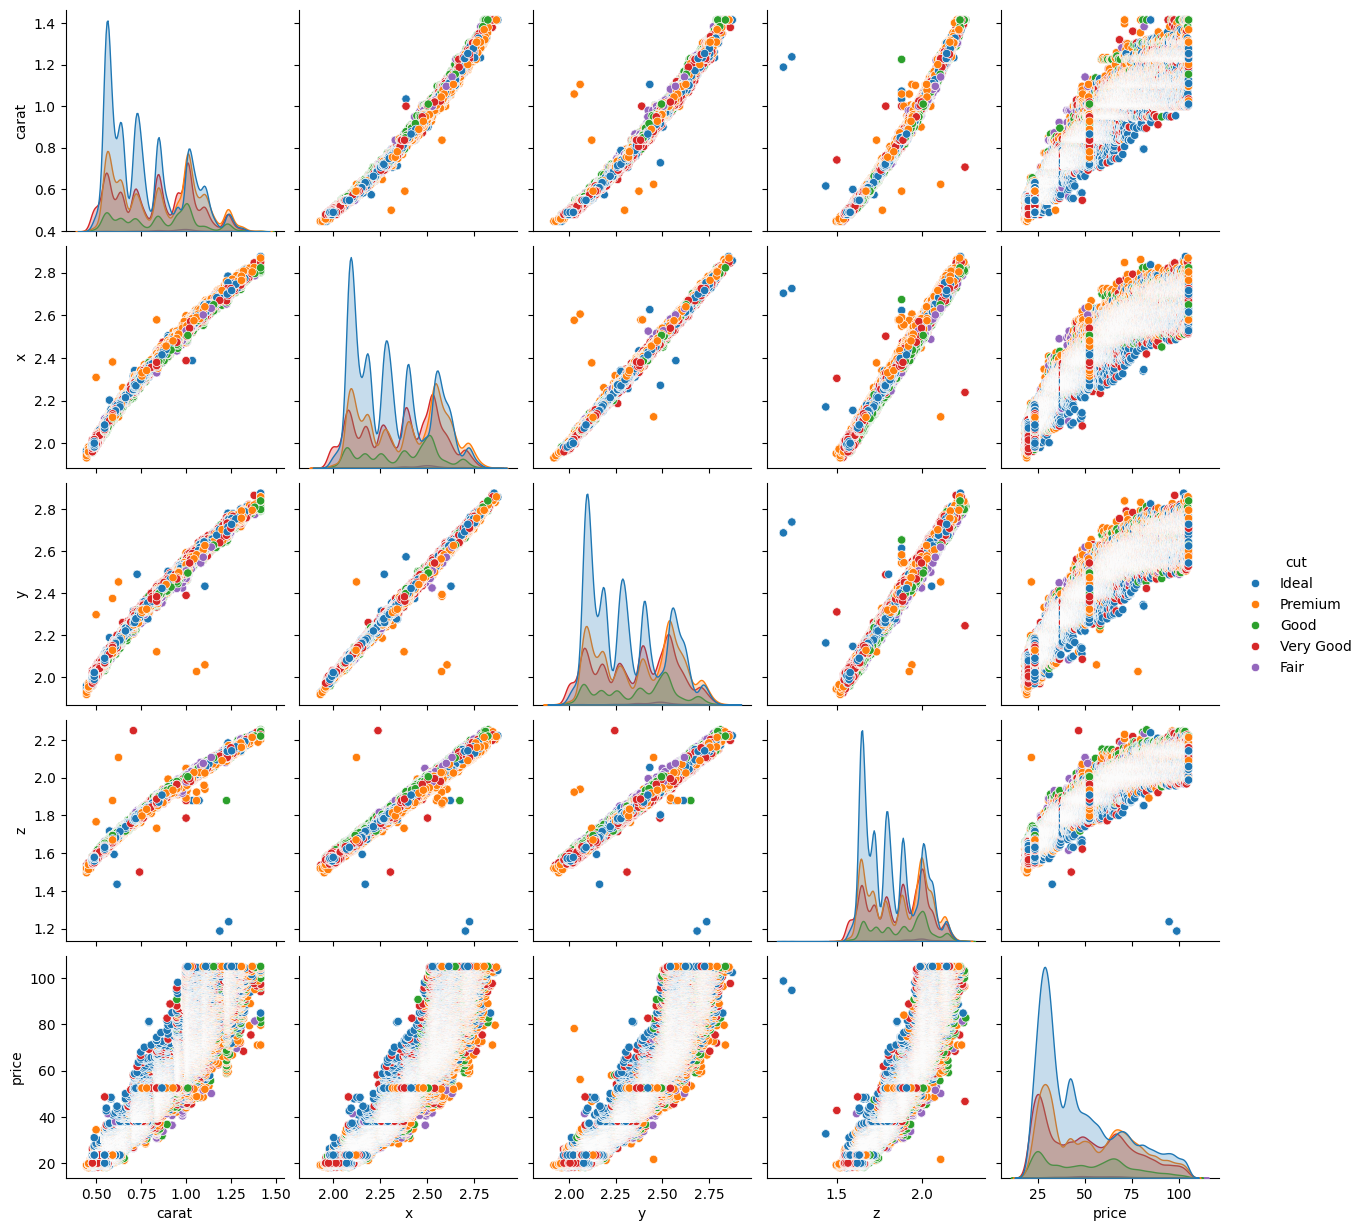

In [24]:
#Pairwise relationships using sns.pairplot()
sns.pairplot(df_eda, vars=["carat", "x", "y", "z", "price"], hue="cut")
plt.show()


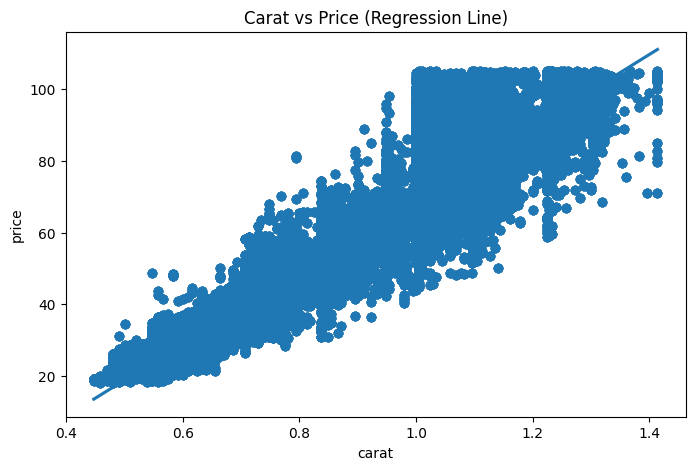

In [25]:
# Carat vs. price regression lineplot
plt.figure(figsize=(8,5))
sns.regplot(x="carat", y="price", data=df_eda, scatter_kws={"alpha":0.4})
plt.title("Carat vs Price (Regression Line)")
plt.show()

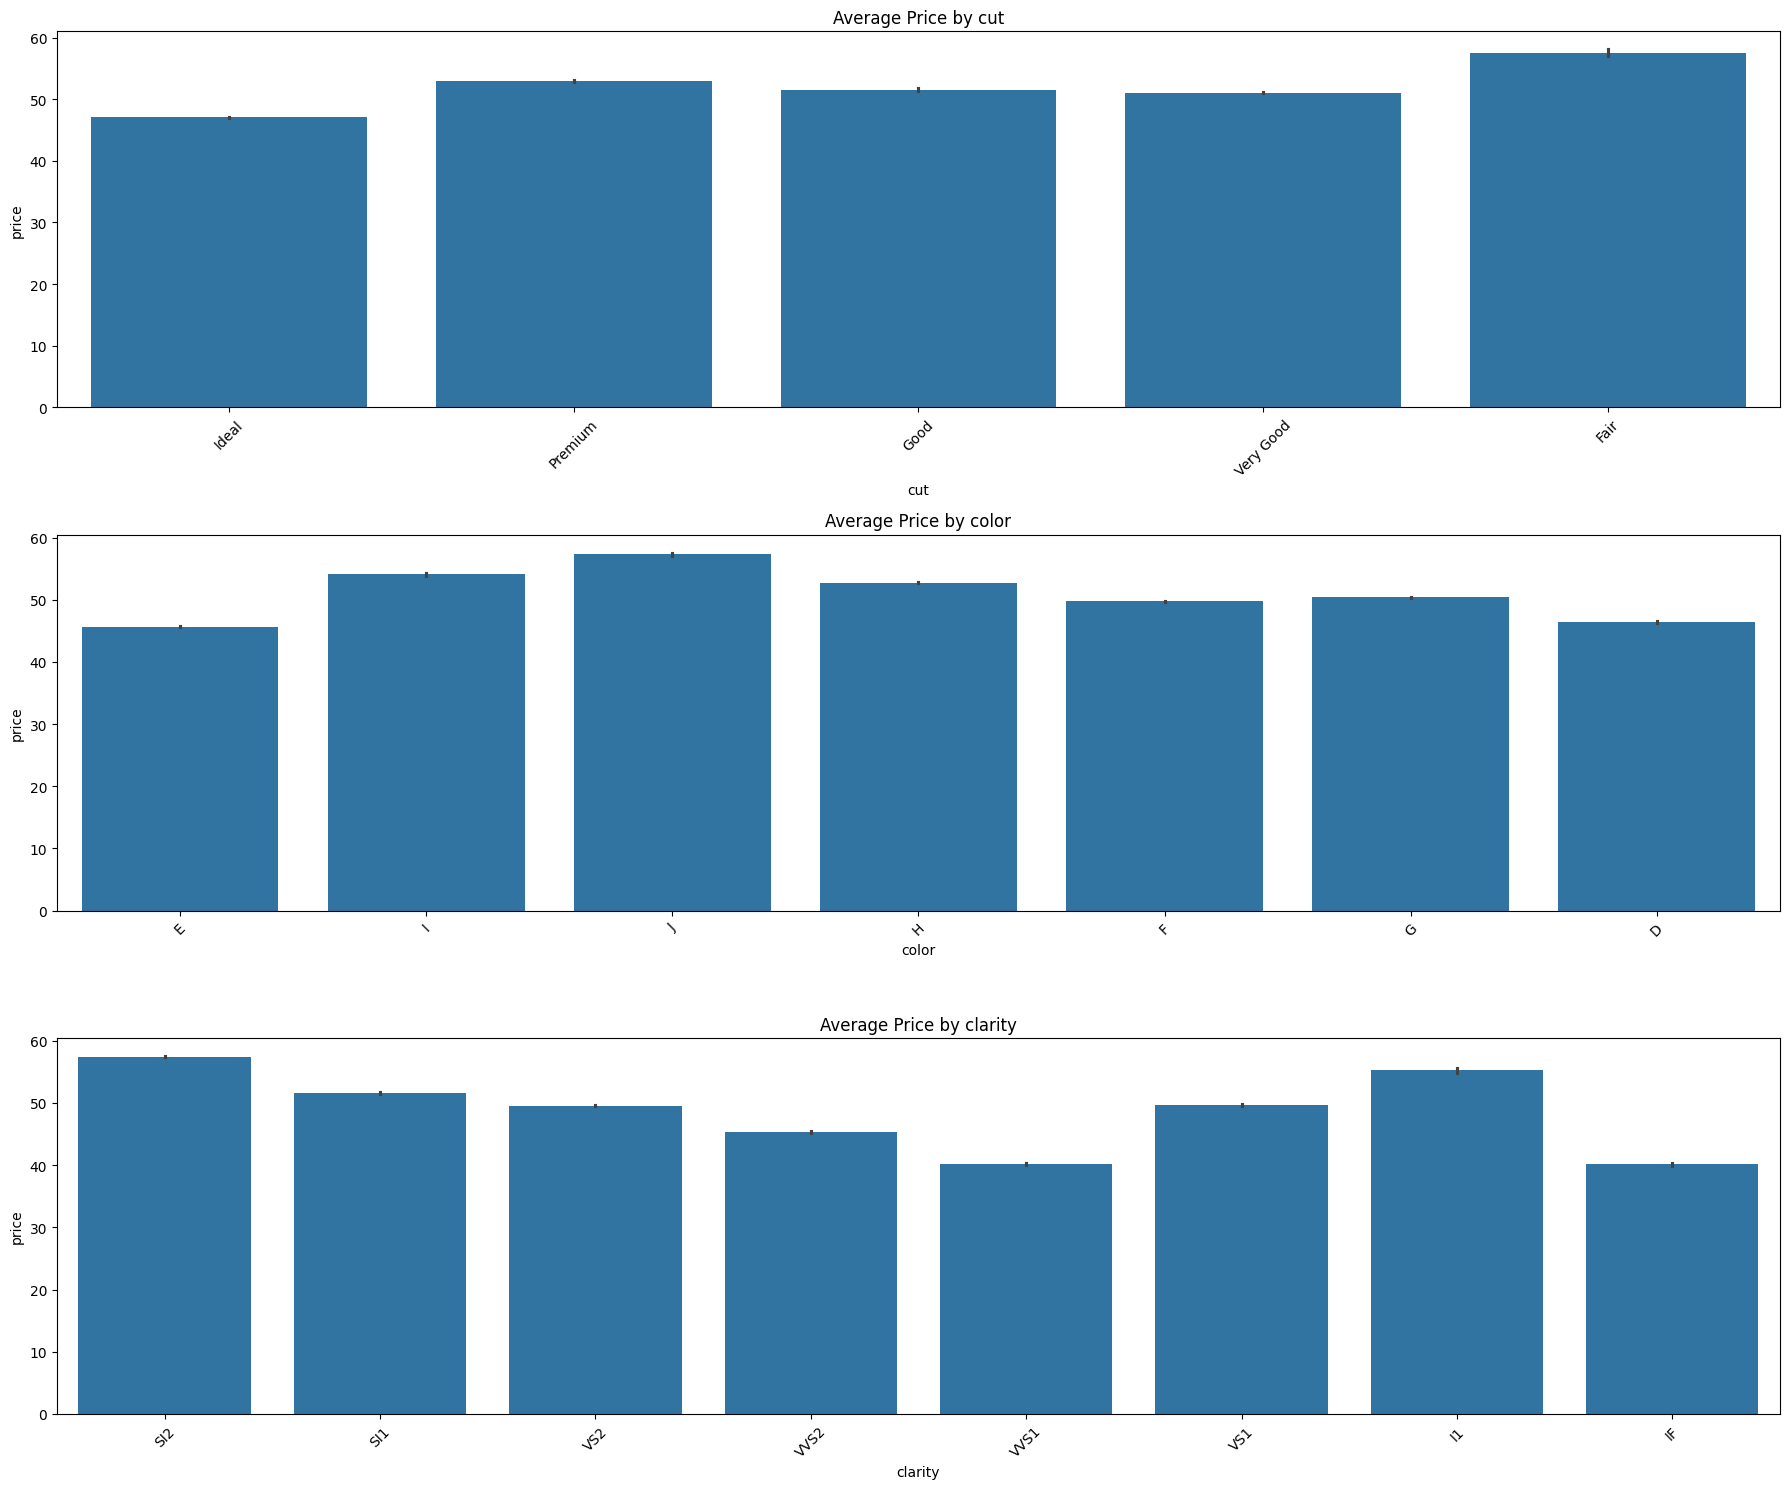

In [26]:
# Average price per cut, color, clarity categories using bar plots
plt.figure(figsize=(18,15))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)
    sns.barplot(data=df_eda, x=col, y="price", estimator=np.mean)
    plt.title(f"Average Price by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [27]:
#feature engineering
df_fe = df_pre.copy()

In [28]:
usd_to_inr = 83.0   # Example: 1 USD = ₹83

df_fe["price_inr"] = df_fe["price"] * usd_to_inr


In [29]:
#volume
df_fe["volume"] = df_fe["x"] * df_fe["y"] * df_fe["z"]

In [30]:
# price per carat
df_fe["price_per_carat"] = df_fe["price"] / df_fe["carat"]

In [31]:
#dimension ratio
df_fe["dimension_ratio"] = (df_fe["x"] + df_fe["y"]) / (2 * df_fe["z"])

In [32]:
#carat category
def carat_category(c):
    if c < 0.5:
        return "Light"
    elif c <= 1.5:
        return "Medium"
    else:
        return "Heavy"

df_fe["carat_category"] = df_fe["carat"].apply(carat_category)

In [33]:
df_fe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_inr,volume,price_per_carat,dimension_ratio,carat_category
0,0.479583,Ideal,E,SI2,61.5,55.0,18.055470,1.987461,1.994994,1.558846,1498.604017,6.180779,37.648258,1.277373,Light
1,0.458258,Premium,E,SI1,59.8,61.0,18.055470,1.972308,1.959592,1.519868,1498.604017,5.874169,39.400266,1.293500,Light
3,0.538516,Premium,I,VS2,62.4,58.0,18.275667,2.049390,2.056696,1.621727,1516.880351,6.835538,33.937061,1.265961,Medium
4,0.556776,Good,J,SI2,63.3,58.0,18.303005,2.083267,2.085665,1.658312,1519.149433,7.205363,32.873168,1.256980,Medium
5,0.489898,Very Good,J,VVS2,62.8,57.0,18.330303,1.984943,1.989975,1.574802,1521.415131,6.220446,37.416574,1.262038,Light


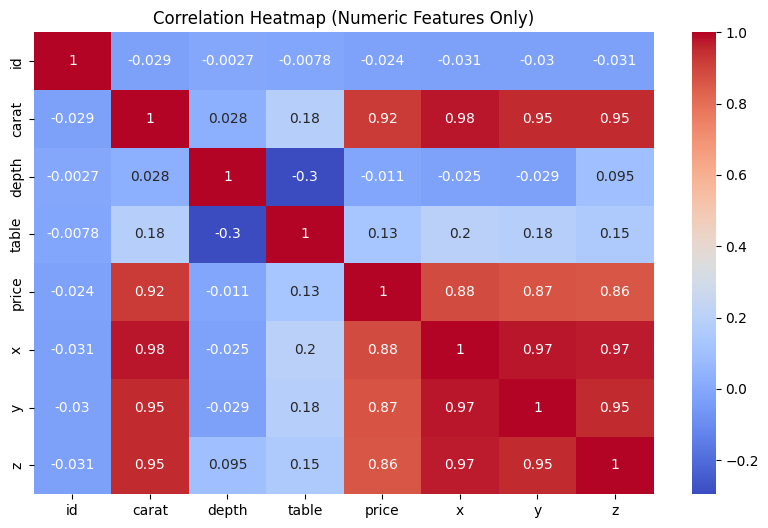

In [34]:
#feature selection
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

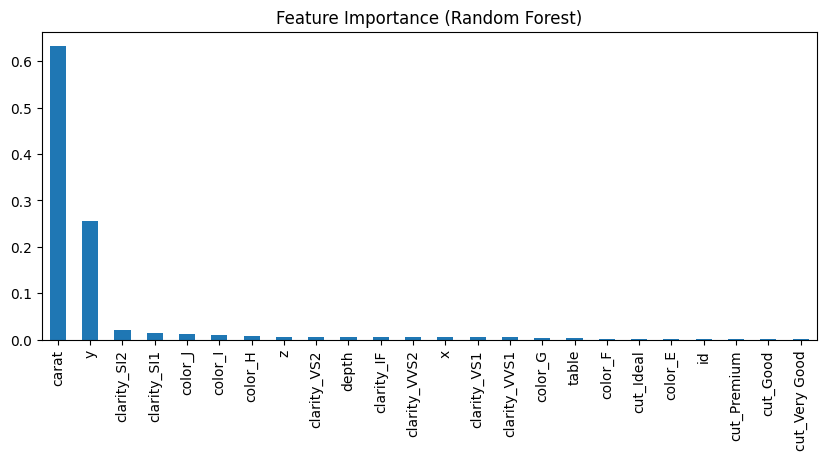

In [35]:
#feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

X = df.drop("price", axis=1)
y = df["price"]

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title("Feature Importance (Random Forest)")
plt.show()

In [36]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop("price", axis=1)
y = df["price"]

X = pd.get_dummies(X, drop_first=True)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)

Selected Features by RFE:
Index(['carat', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')


In [37]:
#Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_df = df.select_dtypes(include=['int64','float64'])

vif_df = pd.DataFrame()
vif_df["Feature"] = num_df.columns
vif_df["VIF"] = [variance_inflation_factor(num_df.values, i) for i in range(len(num_df.columns))]

print(vif_df)

  Feature          VIF
0      id     4.000159
1   carat   103.741291
2   depth   518.232192
3   table   501.313611
4   price    13.466374
5       x  1289.001301
6       y   531.488763
7       z   543.312449


In [38]:
# Ordinal Encoding
import pandas as pd

df_encoded = df.copy()

# ---- Ordinal Encoding ----
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

df_encoded['cut'] = df_encoded['cut'].astype('category').cat.set_categories(cut_order, ordered=True).cat.codes
df_encoded['color'] = df_encoded['color'].astype('category').cat.set_categories(color_order, ordered=True).cat.codes
df_encoded['clarity'] = df_encoded['clarity'].astype('category').cat.set_categories(clarity_order, ordered=True).cat.codes

df_encoded.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335.0,4.34,4.35,2.75


In [39]:
#regression
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [40]:
X = df_encoded.drop(['price'], axis=1)  # Only drop 'price'
y = df_encoded['price']   

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MAE: 803.9945244784884
MSE: 1472334.2176605766
RMSE: 1213.3977986054601
R2: 0.9077322987865831


In [43]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Train model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2:", r2_score(y_test, y_pred_dt))

Decision Tree Metrics
MAE: 1.0422406662673627
MSE: 281.31911525626765
RMSE: 16.772570323485535
R2: 0.999982370396775


In [45]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest Metrics
MAE: 1.2155623413479362
MSE: 185.52783211206895
RMSE: 13.620860182531386
R2: 0.9999883734098042


In [46]:
#XGBoost Regressor
from xgboost import XGBRegressor

# Train model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2:", r2_score(y_test, y_pred_xgb))


XGBoost Metrics
MAE: 227.60694945627984
MSE: 167031.90467556464
RMSE: 408.6953690410067
R2: 0.9895325058068671


In [47]:
#K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

# Train model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R2:", r2_score(y_test, y_pred_knn))

KNN Metrics
MAE: 32.59809189697954
MSE: 75476.5341741536
RMSE: 274.7299295201628
R2: 0.9952700642148558


In [48]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','XGBoost','KNN'],
    'R2': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_dt),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_xgb),
           r2_score(y_test, y_pred_knn)]
})

best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
print("Best Model:", best_model_name)

Best Model: Random Forest


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

num_cols = ["carat", "depth", "table", "x", "y", "z"]
cat_cols = ["cut", "color", "clarity"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, "best_price_model.pkl")

['best_price_model.pkl']

In [49]:
# Save the best model
joblib.dump(best_model_name, "best_price_model.pkl")
print("Best model saved as best_price_model.pkl")

Best model saved as best_price_model.pkl


In [50]:
#CLUSTERING
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_encoded.columns


Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [52]:
cluster_df = df_encoded.drop(['price'], axis=1)

# Check
cluster_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,4.34,4.35,2.75


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)

print("Scaled features shape:", cluster_scaled.shape)
# Save the scaler
joblib.dump(scaler, "cluster_scaler.pkl")

Scaled features shape: (701220, 10)


['cluster_scaler.pkl']

In [71]:
import joblib
import pandas as pd

# Suppose 'cluster_encoded' is your one-hot encoded training data for clustering
cluster_columns = cluster_scaled.tolist()

# Save columns for later use
joblib.dump(cluster_columns, "cluster_columns.pkl")


['cluster_columns.pkl']

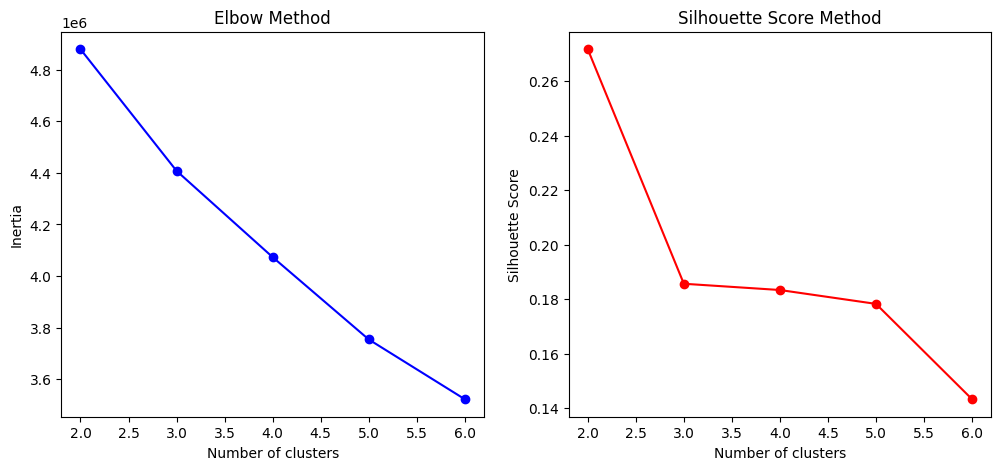

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Use scaled features
X_cluster = cluster_scaled

# Random sample for silhouette
sample_size = 5000
sample_indices = np.random.choice(X_cluster.shape[0], sample_size, replace=False)
X_sample = X_cluster[sample_indices]

K = range(2, 7)  # smaller range
inertia = []
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_sample, labels[sample_indices]))

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [55]:
final_k = 4  # choose based on elbow + silhouette analysis
kmeans_final = KMeans(n_clusters=final_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_cluster)

df_encoded['cluster'] = cluster_labels

# Save clustering model
joblib.dump(kmeans_final, "kmeans_model.pkl")

['kmeans_model.pkl']

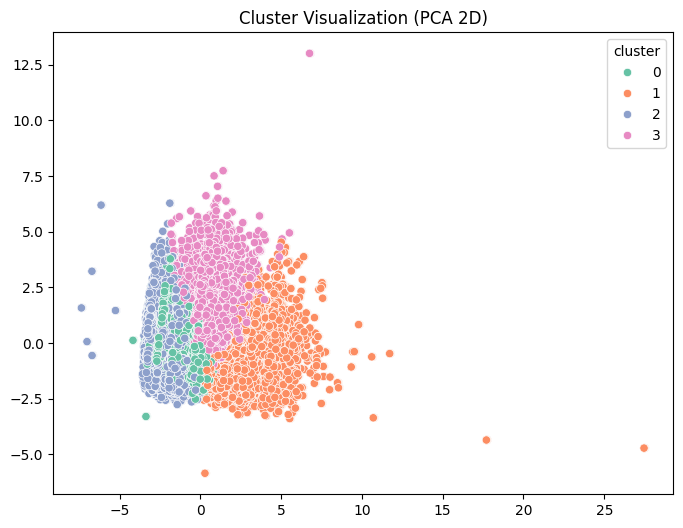

In [56]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_encoded['cluster'], palette='Set2')
plt.title("Cluster Visualization (PCA 2D)")
plt.show()

In [57]:
# Ensure cluster column exists
df_encoded['cluster'] = kmeans.labels_

# Use 'price' instead of 'price_inr'
cluster_summary = df_encoded.groupby('cluster').agg({
    'carat': 'mean',
    'price': ['mean', 'count'],
    'cut': 'mean'
}).round(2)

cluster_summary

carat     price           cut
         mean      mean   count  mean
cluster                              
0        0.81   3504.29   75333  2.05
1        1.72  11561.34   86335  2.75
2        0.42   1130.89  162651  3.27
3        0.39   1135.66  142374  3.33
4        1.01   5513.85  151066  3.51
5        0.88   3798.64   83461  1.29

In [58]:
#Cluster Naming Logic
def name_cluster(row):
    if row['carat']['mean'] > 1.0 and row['price']['mean'] > 10000:
        return "Premium Heavy Diamonds"
    elif row['carat']['mean'] < 0.5 and row['price']['mean'] < 3000:
        return "Affordable Small Diamonds"
    else:
        return "Mid-range Balanced Diamonds"

cluster_summary['Cluster Name'] = cluster_summary.apply(name_cluster, axis=1)
cluster_summary

carat     price           cut                 Cluster Name
         mean      mean   count  mean                             
cluster                                                           
0        0.81   3504.29   75333  2.05  Mid-range Balanced Diamonds
1        1.72  11561.34   86335  2.75       Premium Heavy Diamonds
2        0.42   1130.89  162651  3.27    Affordable Small Diamonds
3        0.39   1135.66  142374  3.33    Affordable Small Diamonds
4        1.01   5513.85  151066  3.51  Mid-range Balanced Diamonds
5        0.88   3798.64   83461  1.29  Mid-range Balanced Diamonds

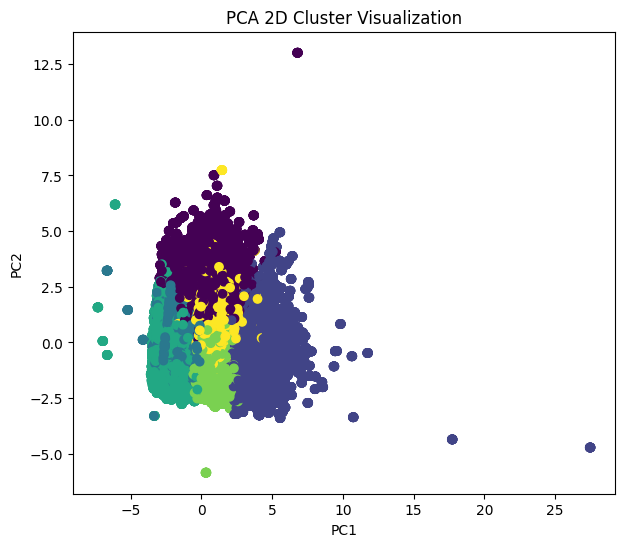

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# FIX: Recreate df_cluster if not defined
df_cluster = df_encoded.copy()
df_cluster['cluster'] = kmeans.labels_

# PCA Transformation
pca = PCA(n_components=2)
pca_2D = pca.fit_transform(cluster_scaled)

# Plot PCA 2D
plt.figure(figsize=(7,6))
plt.scatter(pca_2D[:,0], pca_2D[:,1], c=df_cluster['cluster'], cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Cluster Visualization")
plt.show()

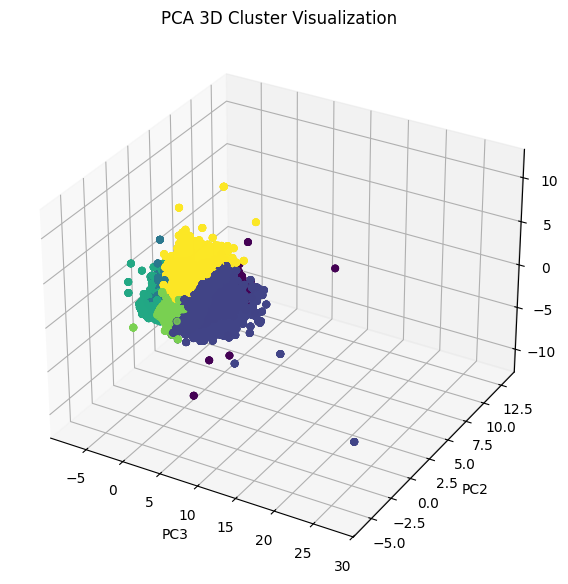

In [61]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
pca_3D = pca3.fit_transform(cluster_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_3D[:,0], pca_3D[:,1], pca_3D[:,2],
           c=df_cluster['cluster'], cmap='viridis')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlabel("PC3")
plt.title("PCA 3D Cluster Visualization")
plt.show()

In [62]:
import joblib

joblib.dump(kmeans, "best_clustering_model.pkl")
print("Model saved successfully!")

Model saved successfully!
